# Ranked Choice Voting

Ranked Choice Voting (RCV), also known as Instant Runoff Voting, is a voting system that allows voters to rank candidates in order of preference. Instead of selecting just one candidate, voters have the option to rank multiple candidates from their most preferred to least preferred.

In RCV, the counting process involves multiple rounds. In each round, the candidate with the fewest first-choice votes is eliminated. The votes for the eliminated candidate are then redistributed to the remaining candidates based on the voters' next preferences. This process continues until one candidate receives a majority of the votes.

RCV is designed to ensure that the winning candidate has the support of the majority of voters. It also allows voters to express their preferences for multiple candidates without worrying about "wasting" their vote on a less popular candidate.

Generate Votes

In [209]:
import csv
import random

# Define the candidates
candidates = ["Alice", "Bob", "Charlie", "Diana", "Eve", "Frank", "Grace", "Hank"]
eliminated_candidates = []

# Create vote data (each sublist represents a voter's ranked choices)
votes = []
num_voters = 1000

# for _ in range(num_voters):
#     vote = random.sample(candidates, len(candidates))
#     votes.append(vote)

# Write the data to a CSV file
with open('votes.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["voter"] + [f"choice_{i+1}" for i in range(len(candidates))]) 
    
    for i in range(num_voters):
        # Generate unique candidate choices for each voter
        # vote = random.sample(candidates.tolist(), len(candidates))        
        vote = random.sample(candidates, len(candidates))
        writer.writerow([f"voter {i+1}"] + vote)

Preprocessing data and declaring initial variables

In [219]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('votes.csv')
df['current_winner'] = df['choice_1']
# Create an array with a list of all the candidates
candidates = df['current_winner'].unique()
num_candidates = len(df.columns[1:-1].tolist())

# Display the dataframe
# print(df.to_string())

# Initialize the list of winners
winners = []
round_number = 1


In [215]:
import matplotlib.pyplot as plt

def RankedChoiceVotingRound(df, candidates, round_text, num_candidates):
    # Count the number of first-choice votes for each candidate
    first_choice_votes = df['current_winner'].value_counts()

    total_votes = first_choice_votes.sum()
    round_winner_votes = -1
    round_winner = None
    # Print the results of the current round
    print(f"{round_text}")
    for candidate, votes in first_choice_votes.items():
        print(f"{candidate}: {votes} votes")
        if votes > round_winner_votes:
            round_winner_votes = votes
            round_winner = candidate
    print(f"Total Votes: {total_votes}\n")
    
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot pie chart
    axs[0].pie(first_choice_votes, labels=[f'{candidate}\n({votes} votes)' for candidate, votes in first_choice_votes.items()], autopct='%1.2f%%', startangle=140)
    axs[0].set_title(f'{round_text} - Pie Chart')

    # Plot bar chart
    colors = plt.cm.tab20.colors[:len(first_choice_votes)]
    axs[1].bar(first_choice_votes.index, first_choice_votes.values, color=colors)
    axs[1].set_title(f'{round_text} - Bar Chart')
    axs[1].set_xlabel('Candidates')
    axs[1].set_ylabel('Number of Votes')
    axs[1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    # Add whitespace between subplots
    fig.subplots_adjust(wspace=0.5)

    # Display the figure
    plt.show()
    
    # Identify the candidate with the fewest votes
    min_votes = first_choice_votes.min()
    eliminated_candidate = first_choice_votes[first_choice_votes == min_votes].index[0]
    print(f"Eliminated Candidate: {eliminated_candidate}\nNumber of Votes: {min_votes}\n")
    
    # Eliminate the candidate with the fewest votes
    candidates = [candidate for candidate in candidates if candidate != eliminated_candidate]
    
    # Redistribute the votes of the eliminated candidate
    def redistribute_votes(row):
        if row['current_winner'] == eliminated_candidate:
            for i in range(1, num_candidates+1):
                if row[f'choice_{i}'] in candidates:
                    return row[f'choice_{i}']
            return None
        return row['current_winner']
    
    df['current_winner'] = df.apply(redistribute_votes, axis=1)

    # print(df.to_string() + "\n")

    if len(candidates) == 1:
        return df, candidates, round_winner
    
    return df, candidates, round_winner


### Traditional Voting

Round 1
Diana: 132 votes
Frank: 130 votes
Bob: 127 votes
Charlie: 125 votes
Grace: 125 votes
Hank: 123 votes
Eve: 120 votes
Alice: 118 votes
Total Votes: 1000



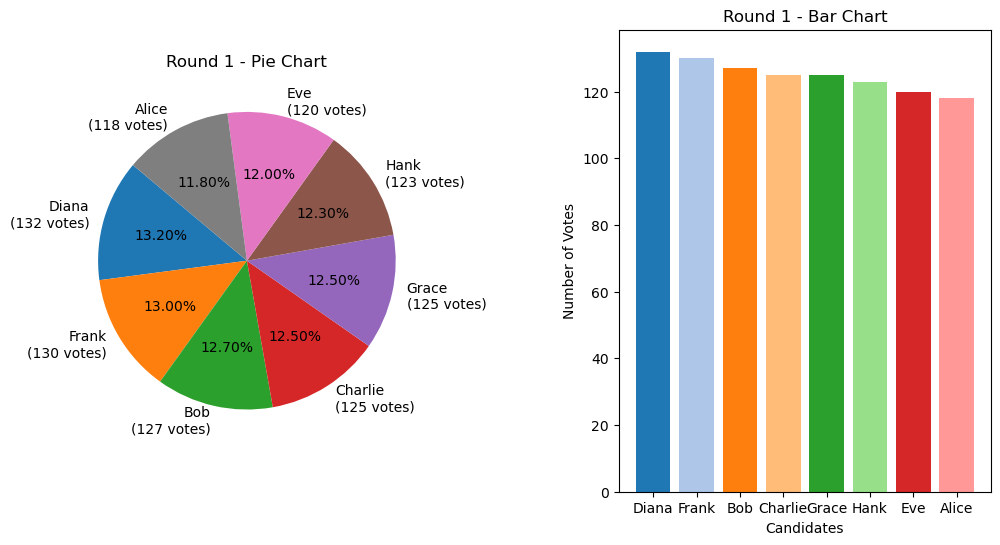

Eliminated Candidate: Alice
Number of Votes: 118

Traditional Voting:
Winner: Diana


In [220]:
_, _, traditional_winner = RankedChoiceVotingRound(df, candidates, f"Traditional Voting", num_candidates)
candidates = df['choice_1'].unique()
# df['current_winner'] = df['choice_1']

print(f"Traditional Voting:\nWinner: {traditional_winner}")

### Ranked Choice Voting

Round 1
Diana: 132 votes
Frank: 130 votes
Bob: 127 votes
Charlie: 125 votes
Grace: 125 votes
Hank: 123 votes
Eve: 120 votes
Alice: 118 votes
Total Votes: 1000



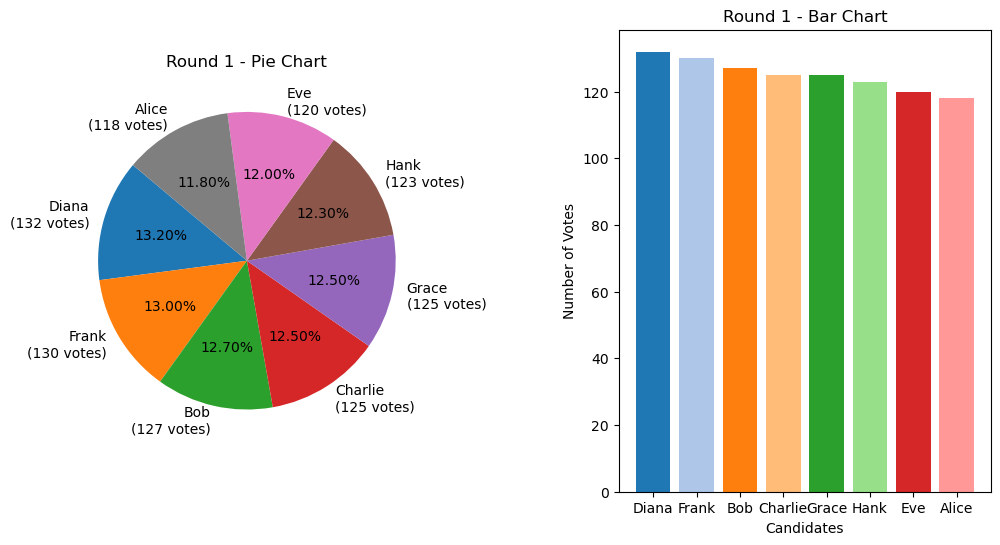

Eliminated Candidate: Alice
Number of Votes: 118

Round 2
Diana: 153 votes
Frank: 147 votes
Grace: 145 votes
Bob: 140 votes
Eve: 140 votes
Hank: 138 votes
Charlie: 137 votes
Total Votes: 1000



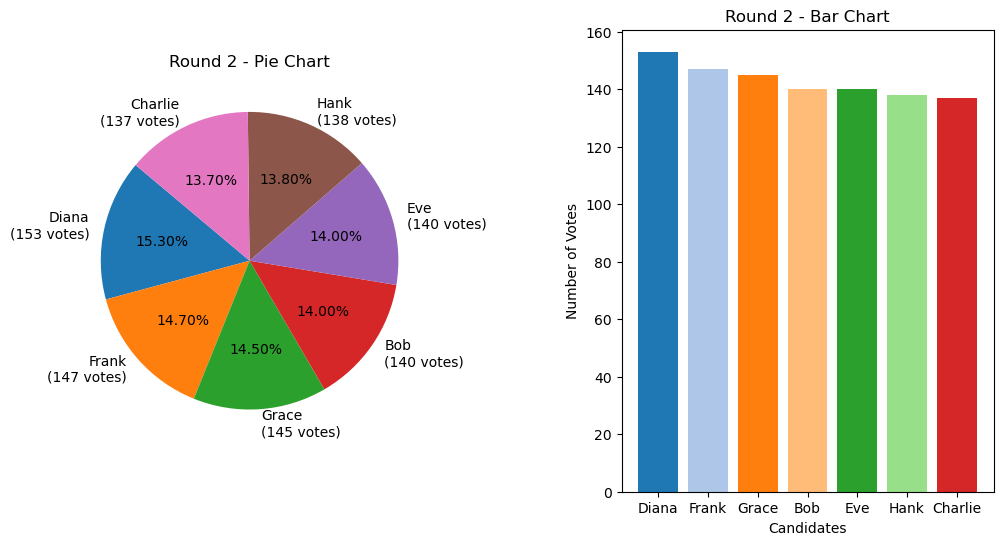

Eliminated Candidate: Charlie
Number of Votes: 137

Round 3
Diana: 176 votes
Frank: 171 votes
Grace: 168 votes
Eve: 166 votes
Hank: 165 votes
Bob: 154 votes
Total Votes: 1000



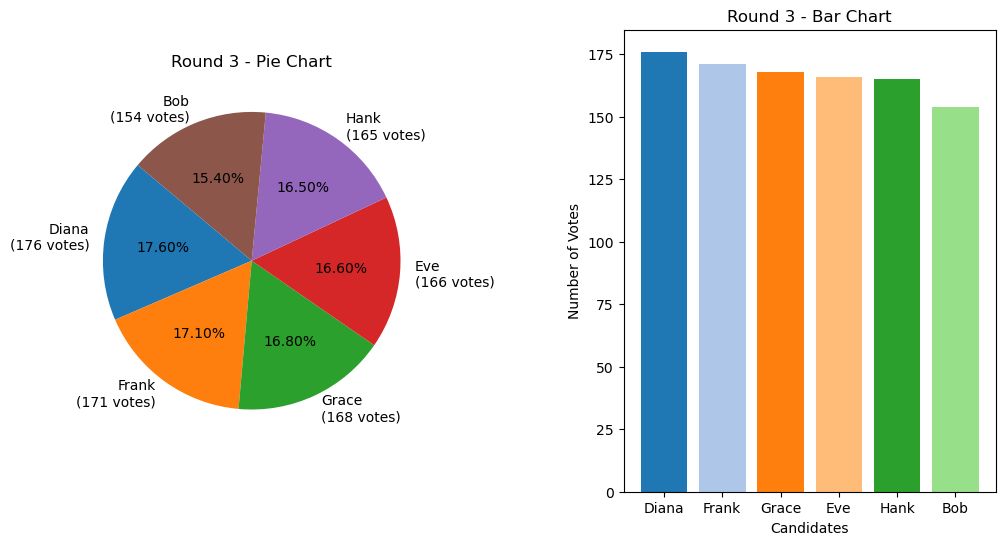

Eliminated Candidate: Bob
Number of Votes: 154

Round 4
Diana: 208 votes
Grace: 204 votes
Frank: 200 votes
Eve: 198 votes
Hank: 190 votes
Total Votes: 1000



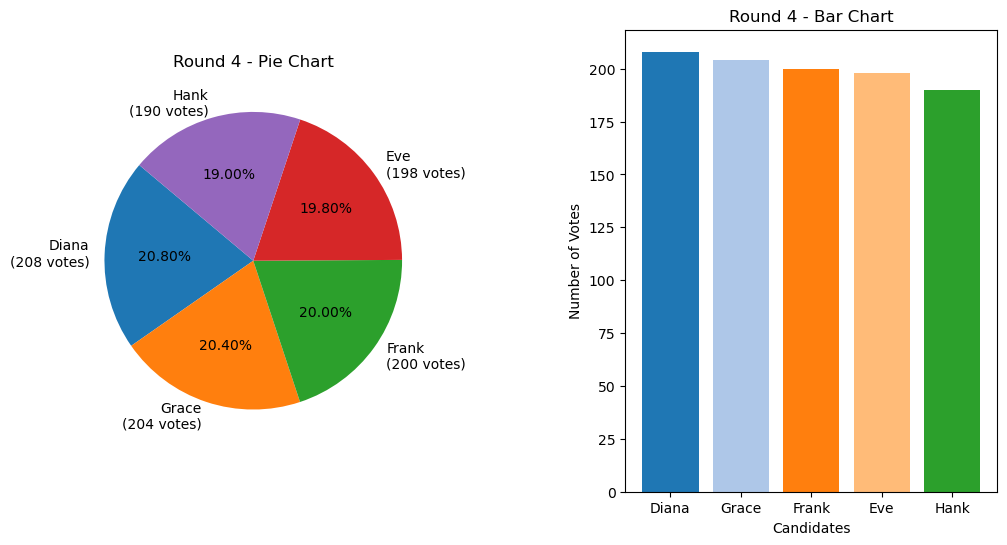

Eliminated Candidate: Hank
Number of Votes: 190

Round 5
Grace: 258 votes
Diana: 251 votes
Frank: 247 votes
Eve: 244 votes
Total Votes: 1000



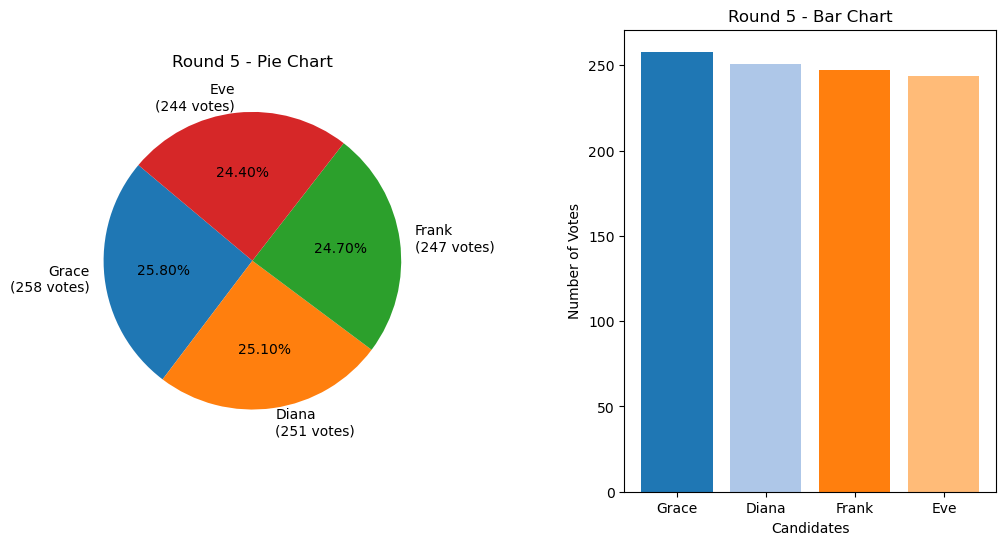

Eliminated Candidate: Eve
Number of Votes: 244

Round 6
Grace: 348 votes
Frank: 331 votes
Diana: 321 votes
Total Votes: 1000



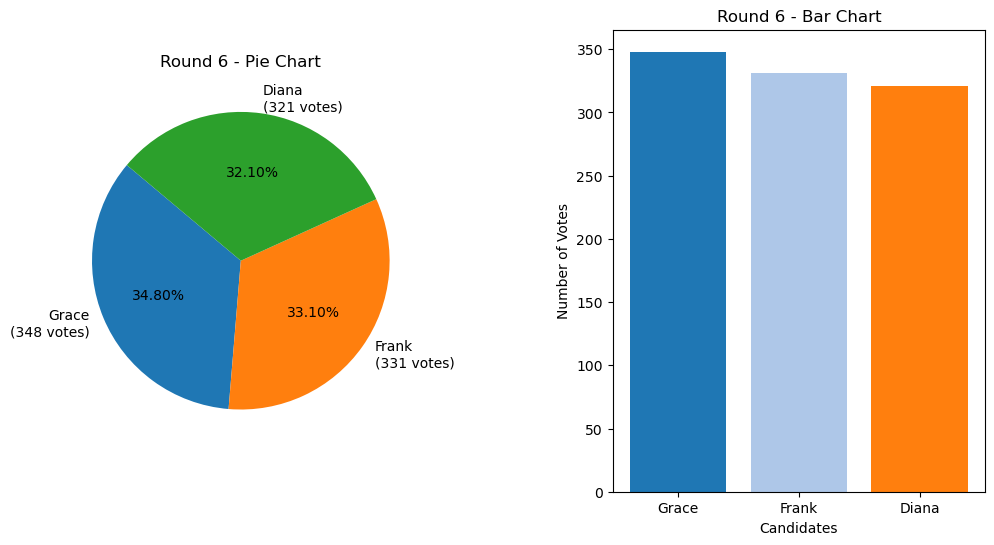

Eliminated Candidate: Diana
Number of Votes: 321

Round 7
Frank: 507 votes
Grace: 493 votes
Total Votes: 1000



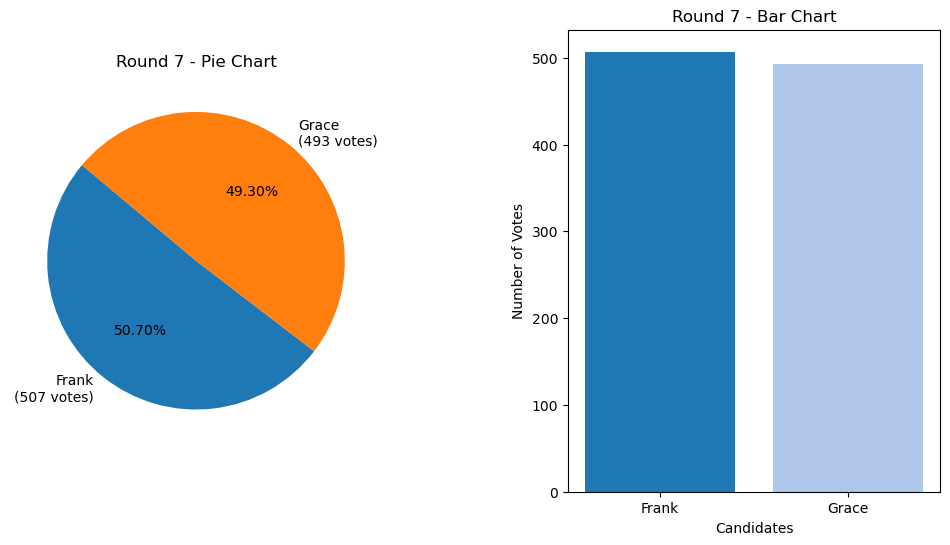

Eliminated Candidate: Grace
Number of Votes: 493

Round 8
Frank: 1000 votes
Total Votes: 1000



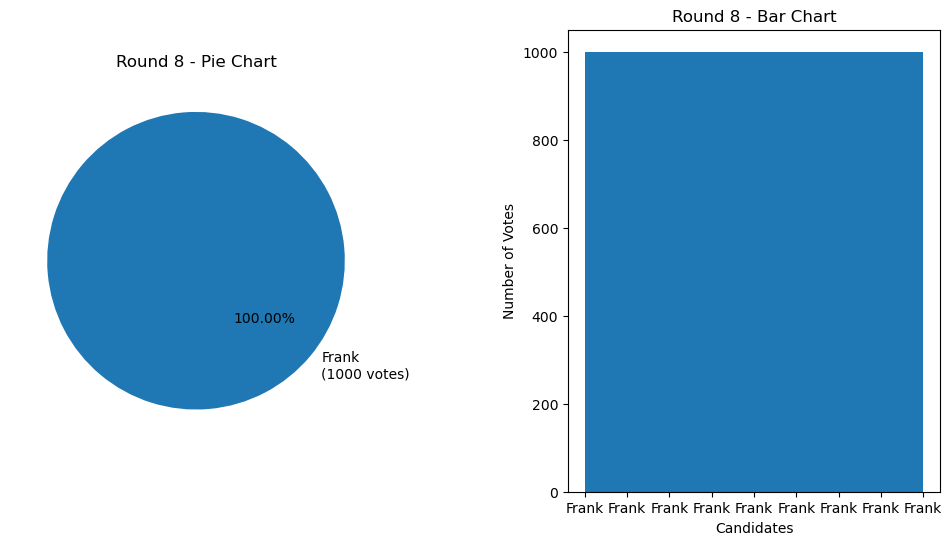

Eliminated Candidate: Frank
Number of Votes: 1000

Ranked Choice Voting:
Winner: Frank


In [221]:
while len(candidates) > 1:
    df, candidates, rcv_winner = RankedChoiceVotingRound(df, candidates, f"Round {round_number}", num_candidates)
    
    round_number += 1

_, _, _ = RankedChoiceVotingRound(df, candidates, f"Round {round_number}", num_candidates)


# Print the winner
print(f"Ranked Choice Voting:\nWinner: {rcv_winner}")